The goal here is to evaluate the errors introduced adversarial training by a analyzing the added noise

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [2]:
origWeights = np.load('origWeights.npy')
modifiedWeights = np.load('modifiedWeights.npy')
origBiases = np.load('origBiases.npy')
modifiedBiases = np.load('modifiedBiases.npy')

In [3]:
def compute_minAndMax(listArrays):
    '''
    Function to find the smallest and largest elements 
    in a list of numpy arrays
    '''
    minVal = np.inf
    maxVal = -np.inf
    for arr in listArrays:
        if arr.min() < minVal:
            minVal = arr.min()
        if arr.max() > maxVal:
            maxVal = arr.max()
    return minVal, maxVal

In [4]:
def measure_noise(origValues, modifiedValues):
    noiseValues = []
    for origArr, modifiedArr in zip(origValues, modifiedValues):
        # error_arr is the element-wise difference of all values in the array
        errorArr = origArr - modifiedArr
        noiseValues.append(errorArr)
    return noiseValues

In [5]:
# mnist images are grayscale, so the depth is 1. In cifar10, depth is 3.
# The first 5 layers are convolutional layers in case of cifar10 while 
# only the first 3 are in case of mnist.
if origWeights[0].shape[2] == 1:
    numConvLayers = 3
else:
    numConvLayers = 5
r = measure_noise(origWeights[:numConvLayers], modifiedWeights[:numConvLayers])
min_noise, max_noise = compute_minAndMax(r)
print(min_noise, max_noise)

-0.0074427836 0.0074938983


In [6]:
for layer in r:
    print(layer.T.shape)
allMatrices = []
colors = []
if numConvLayers == 3:
    color = ['r', 'g', 'b']
else:
    color = ['r', 'g', 'b', 'y', 'c']

for layer,c in zip(r,color):
    for filter in layer.T:
        for matrix in filter:
            allMatrices.append(matrix.flatten())
            colors.append(c)
allMatrices_tsne = TSNE(n_components=2, perplexity=100, n_iter=1200).fit_transform(allMatrices)
print(allMatrices_tsne.shape)

(32, 1, 3, 3)
(64, 32, 3, 3)
(64, 64, 3, 3)
(6176, 2)


Text(0.5, 1.0, 'Model Noise')

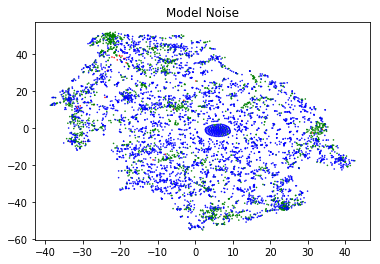

In [7]:
allMatrices_x, allMatrices_y = allMatrices_tsne.T
#plt.figure(figsize=(20,20))
plt.scatter(allMatrices_x, allMatrices_y, s=0.3, c=colors)
plt.title('Model Noise')

Text(0.5, 1.0, 'Model Noise')

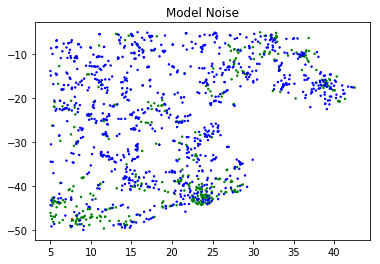

In [10]:
# Code to isolate the circular pattern from the plot
# Using 4 threshold values, I isolate the rectangular 
# region of the plot which contains the circular pattern
x_range = (5,50)
y_range = (-50,-5)
indices = (allMatrices_x < x_range[1]) * (allMatrices_y < y_range[1]) * \
(allMatrices_x > x_range[0]) * (allMatrices_y > y_range[0])

# Plot the isolated pattern to verify that circular pattern 
# was correctly isolated
colors = np.array(colors)
plt.scatter(allMatrices_x[indices], allMatrices_y[indices], c = colors[indices], s=2)
for idx in nonZeroPatternIndices:
    plt.plot(allMatrices_x[idx], allMatrices_y[idx], 'ro', markersize=4)
plt.title('Model Noise')

In [11]:
len(np.nonzero(indices)[0])

1399

In [12]:
patternIndices = np.nonzero(indices)[0]
print(patternIndices)

[   1   11   47 ... 6173 6174 6175]


In [13]:
nonZeroPatternIndices =[]
for idx in np.nditer(patternIndices):
    if (allMatrices[idx] != 0).any():
        nonZeroPatternIndices.append(idx)
        print(idx)

1
11
47
70
102
110
120
198
212
214
221
262
270
280
332
336
337
356
357
360
364
367
368
369
370
375
378
381
382
422
430
480
482
483
484
485
486
487
488
489
490
492
493
494
495
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
518
520
526
527
530
531
533
541
545
573
579
582
586
587
590
591
594
596
597
598
600
602
608
610
612
614
615
616
620
621
622
623
624
627
628
632
636
637
639
655
672
673
674
675
676
677
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
705
707
709
710
712
718
719
720
722
726
727
730
731
733
734
751
769
774
779
780
782
785
787
789
792
797
847
853
870
880
884
886
888
929
932
933
936
937
938
939
940
943
944
945
946
947
949
951
953
955
957
958
959
960
962
966
970
973
974
980
981
982
984
988
1022
1062
1064
1070
1071
1080
1185
1192
1195
1196
1199
1200
1201
1210
1211
1213
1281
1283
1284
1285
1288
1292
1295
1296
1297
1298
1303
1306
1307
1309
1310
1379
1381
1384
1391
1394
1399
1402
1404
1406
1409
1414
1419
1422
1427


In [14]:
allMatrices[7598]

IndexError: list index out of range

In [ ]:
allRandom = []
for i in range(6176):
    randomFilter = (max_noise - min_noise) * np.random.random((3,3)) + min_noise
    allRandom.append(randomFilter.flatten())
#allRandom_tsne = TSNE(n_components=2, perplexity=40, n_iter=1200).fit_transform(allRandom)

In [ ]:
allRandom_x, allRandom_y = allRandom_tsne.T
plt.scatter(allRandom_x, allRandom_y, s=0.3)
plt.title('Random Noise')

In [ ]:
H = np.transpose(r[2])
f, axarr = plt.subplots(2,5, figsize=(15,7))
for num in range(10):
    axarr[num//5][num%5].imshow(H[num][0], cmap='gray', vmin=min_noise, vmax=max_noise)
plt.show()

In [ ]:
f, axarr = plt.subplots(2,5, figsize=(15,7))
for num in range(10):
    H = (max_noise - min_noise) * np.random.random((3,3)) + min_noise
    axarr.ravel()[num].imshow(H, cmap='gray', vmin=min_noise, vmax=max_noise)
plt.show()